# Health Insurance Cross Sell Prediction

## Problem Statement

Source : https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?datasetId=869050&language=Python

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

Objective:
1. Finding which features has great contribution
2. Knowing the relation between Previously_Insured, Vehicle Age, and Vehicle Damage with Response
3. Finding the best analytical model to predict the response to Vehicle Insurance
3. Finding communications strategy plan to reach customers

## Data Description

1. id: Unique ID for the customer
2. Gender: Gender of the customer
3. Age: Age of the customer
4. Driving_License: 1: Customer already has DL, 0: Customer does not have DL
5. Region_Code: Unique code for the region of the customer
6. Previously_Insured: 1: Customer already has Vehicle Insurance, 0: Customer doesn't have Vehicle Insurance
7. Vehicle_Age: Age of the Vehicle
8. Vehicle_Damage: 1: Customer got his/her vehicle damaged in the past, 0: Customer didn't get his/her vehicle damaged in he past.
9. Annual_Premium: The amount customer needs to pay as premium in the year
10. PolicySalesChannel: Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. Vintage: Number of Days, Customer has been associated with the company
12. Response: 1 : Customer is interested, 0 : Customer is not interested

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn import preprocessing

# VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

# Undersampling
from imblearn import under_sampling

# Normalization Data
from sklearn.preprocessing import MinMaxScaler

# Split Dataset
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

## Load Dataset

In [2]:
train = pd.read_csv("train_insurance.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## General Information & Data Cleaning

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Obervation:
1. Data contains 11 column with 381109 rows
2. The data type of Region_Code and Policy_Sales_Channel is float64, we can change them to int64
3. No missing values found, let's check to make sure there are no missing values

In [4]:
# Change the data type of Region_Code and Policy_Sales_Channel to int64
train['Region_Code'] = train['Region_Code'].astype('int64')
train['Policy_Sales_Channel'] = train['Policy_Sales_Channel'].astype('int64')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0


Let's check the Region_Code and Policy_Sales_Channel data types

In [5]:
#Sanity Check for Region_Code
np.dtype(train['Region_Code'])

dtype('int64')

In [6]:
#Sanity Check for Policy_Sales_Channel
np.dtype(train['Policy_Sales_Channel'])

dtype('int64')

#### Check Missing Values

In [7]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Observation: No missing values found, it has been confirmed that there are no missing values

#### Check Duplicates Data 

In [8]:
train.duplicated().sum()

0

Observation: 
1. No duplicate data found.
2. Since there are no missing values and duplicate data, data cleaning is not necessary

In [9]:
# We will drop 'id' cause we won't use it
train.drop('id', axis=1, inplace=True)
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0


## Data Understanding

#### Statistical Summary

In [10]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0


In [11]:
# group column names based on type
# for numerical data
numerical = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
train_num = train[numerical]

# for categorical data
categorical = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
train_cat = train[categorical]

In [12]:
train_num.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Observation:
1. Average customer *Age* is 38 years with *Annual_Premium* 30564 and *Vintage* for 154 days.
2. *Driving_License*, *Previously_Insured*, and *Response* are boolean/binary columns since the value is 0 or 1, so no need to conclude its simmetricity.
3. *Response* is a target variable which is an independent feature.
4. *Age*, *Region_Code*, *Annual_Premium*, and *Policy_Sales_Channel* have skew distribution.
5. *Vintage* has normal distribution.

In [13]:
train_cat.describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Observation:
1. Top **Gender** is Male 
2. Top **Vehicle_Age** is 1-2 year
3. Most customers have **Vehicle_Damage**

## Check Outliers

#### Detect Outliers Using Boxplot

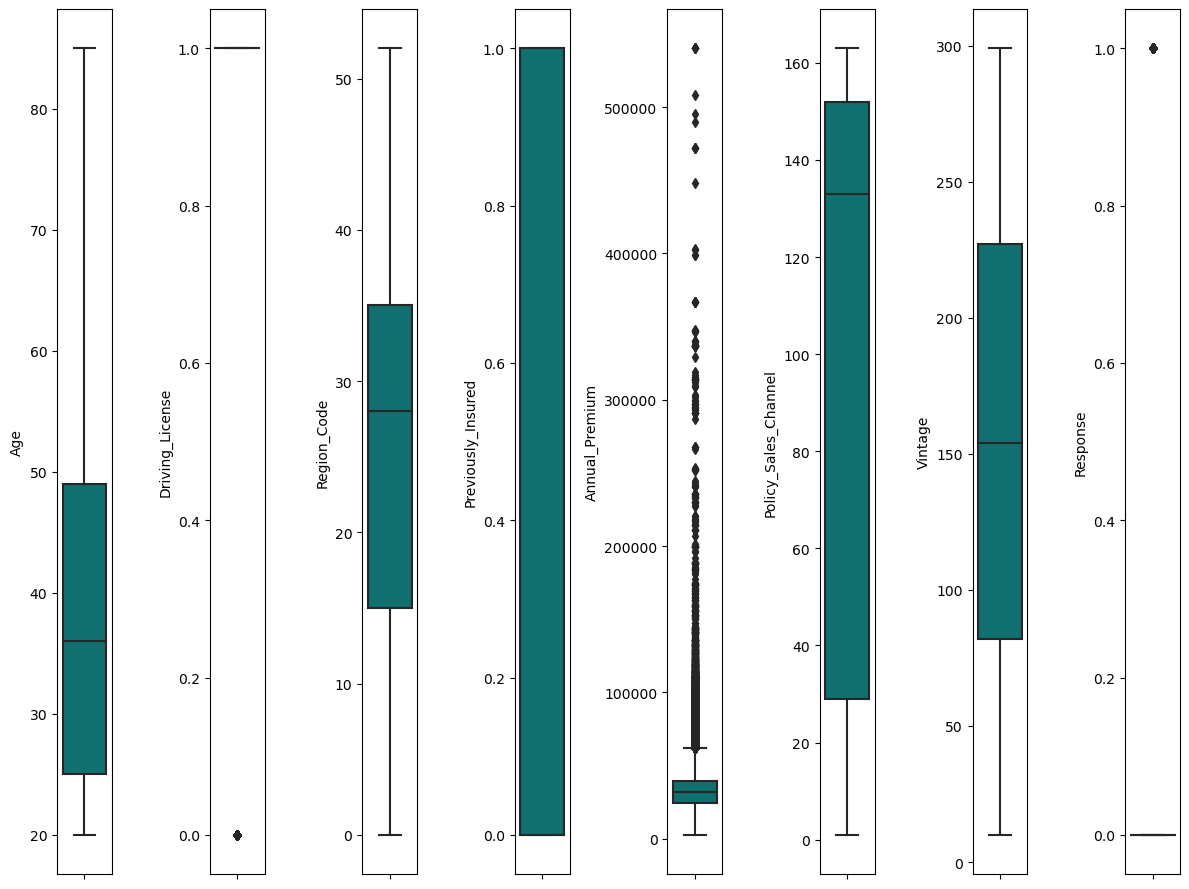

In [14]:
# adjust the figure size for better readability
plt.figure(figsize=(12,9))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=train[features[i]], color='teal')
    plt.tight_layout()

Observation: There are outliers in *Annual_Premium*

#### Remove Outlier Using IQR

In [15]:
# Define IQR
Q1 = train['Annual_Premium'].quantile(0.25)
Q3 = train['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limit
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print('Rows before IQR outlier filter:', len(train))

# Filter data between the limits
train_IQR = train.copy()
train_IQR = train[(train['Annual_Premium'] > lower_limit) & (train['Annual_Premium'] < upper_limit)]

print('Rows after IQR outlier filter:', len(train_IQR))

Rows before IQR outlier filter: 381109
Rows after IQR outlier filter: 370789


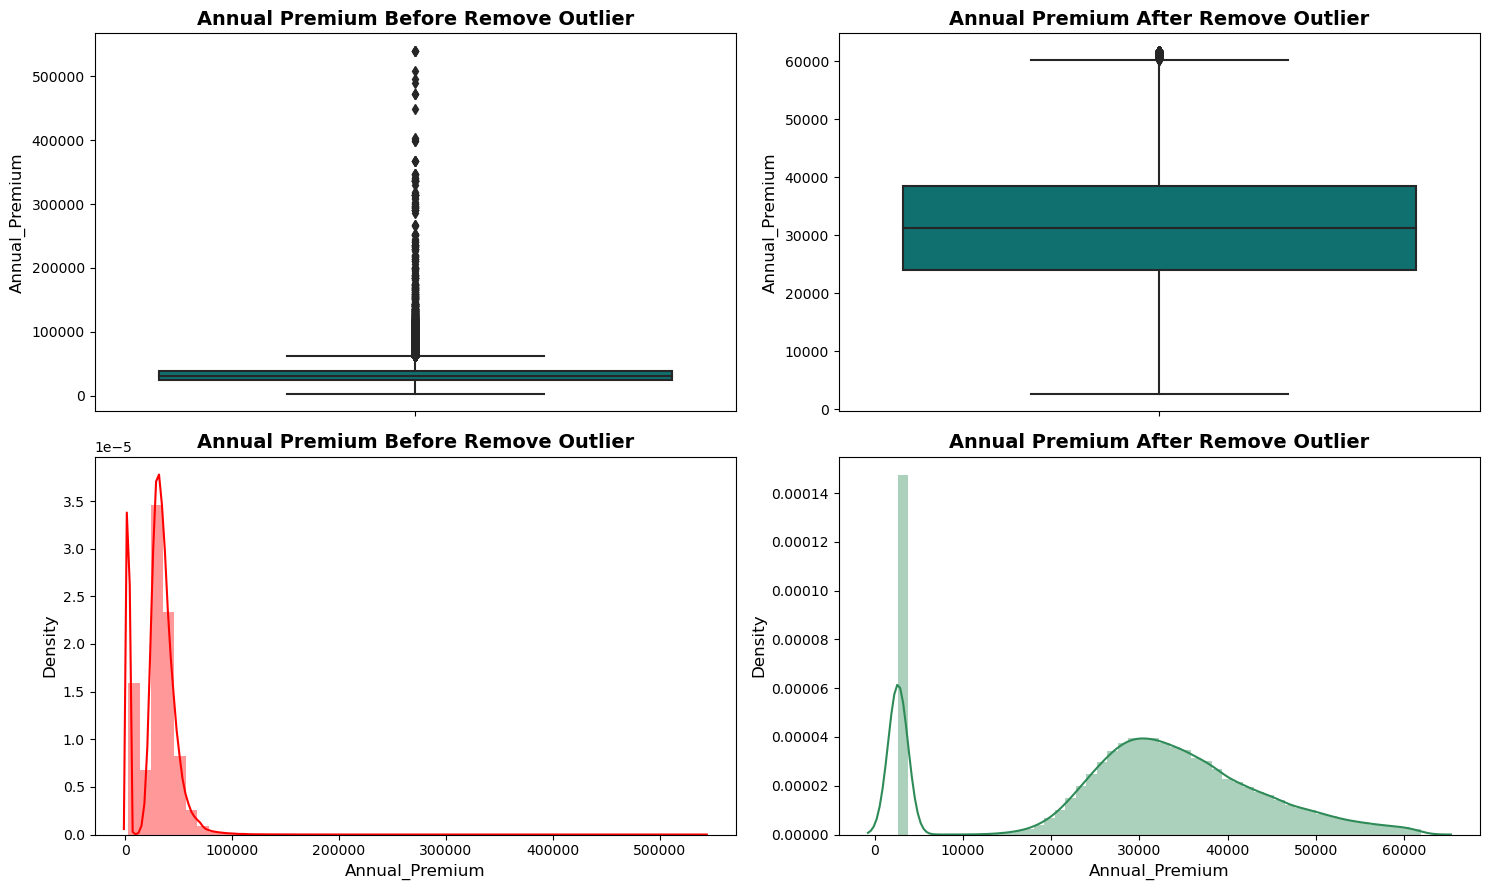

In [16]:
# Sanity Check
fig, axes = plt.subplots(2, 2, figsize = (15,9))

sns.boxplot(ax = axes[0,0], y = 'Annual_Premium', data = train, color='teal')
axes[0,0].set_ylabel(ylabel = 'Annual_Premium', fontsize = 12)
axes[0,0].set_title('Annual Premium Before Remove Outlier', fontdict={'fontsize':14, 'fontweight':'bold'})

sns.boxplot(ax = axes[0,1], y = 'Annual_Premium', data = train_IQR, color='teal')
axes[0,1].set_ylabel(ylabel = 'Annual_Premium', fontsize = 12)
axes[0,1].set_title('Annual Premium After Remove Outlier', fontdict={'fontsize':14, 'fontweight':'bold'})

# Distibution of Annual Premium Before Remove Outlier
sns.distplot(ax = axes[1,0], x = train['Annual_Premium'], color= 'red')
axes[1,0].set_xlabel(xlabel = 'Annual_Premium', fontsize = 12)
axes[1,0].set_ylabel(ylabel = 'Density', fontsize = 12)
axes[1,0].set_title('Annual Premium Before Remove Outlier', fontdict={'fontsize':14, 'fontweight':'bold'})

# Distribution of Annual Premium After Remove Outlier
sns.distplot(ax = axes[1,1], x = train_IQR['Annual_Premium'], color= 'seagreen')
axes[1,1].set_xlabel(xlabel = 'Annual_Premium', fontsize= 12)
axes[1,1].set_ylabel(ylabel = 'Density', fontsize = 12)
axes[1,1].set_title('Annual Premium After Remove Outlier', fontdict={'fontsize':14, 'fontweight':'bold'})
plt.tight_layout()

Observation: Based on the plot on the right we can see that there are no outliers in Annual_Premium

## Exploratory Data Analysis

In [17]:
def distribution_numerical (data, col_name):
    plt.figure(figsize=(20,20))
    plt.subplot(2,1,1)
    sns.countplot(data[col_name], palette='mako')
    plt.title('Distribution of ' + col_name, fontdict={'fontsize':14, 'fontweight':'bold'})
    plt.show()
    
    sns.distplot(data[col_name], color = 'darkorange')
    plt.title('Distribution of ' + col_name, fontdict={'fontsize':10, 'fontweight':'bold'})
    plt.show()

In [18]:
# Visualization of numerical data (binary) and categorical data
def distribution_relation (data, col_name):
    plt.figure(figsize=(15,9))
    # value counts and ratio
    print(pd.DataFrame({col_name : data[col_name].value_counts(),
                        "Ratio": 100 * data[col_name].value_counts() / len(data)}))
    
    # Pie plot
    plt.subplot(1,2,1)
    labels = data[col_name].unique()
    size = data[col_name].value_counts()
    if len(labels)==2:
        colors = ['darkmagenta', 'whitesmoke']
        explode = [0, 0.1]
    if len(labels)==3:
            colors = ['darkmagenta', 'lightcoral', 'whitesmoke']
            explode = [0, 0.1, 0.2]
    plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
    plt.axis('off')
    plt.legend(loc='lower left')
    plt.title('Distribution of ' + col_name, fontdict={'fontsize':12, 'fontweight':'bold'})
    
    # barplot
    plt.subplot(1,2,2)
    sns.countplot(x=data[col_name], data=data, palette = 'mako', hue='Response')
    plt.title('Response of Vehicle Insurance Based On ' + col_name, fontdict={'fontsize':12, 'fontweight':'bold'})
    plt.show()

In [19]:
def distribution_vehicle_damage (col_name):
    plt.figure(figsize=(9,6))
    sns.countplot(train_IQR[col_name], hue=train_IQR["Vehicle_Damage"],  palette = 'mako')
    plt.title('Gender & Vehicle_Damage', fontdict={'fontsize':12, 'fontweight':'bold'})
    plt.show()

In [20]:
def grouping_numerical(data):
    # Grouping Age
    data['Age_Group'] = data['Age'].apply(lambda x:'YouthAge' if x>=20 and x<=25
                                          else 'AdultAge' if x>= 26 and  x<=45
                                          else 'MiddleAge' if x>=46 and x<=65 
                                          else 'OldAge')

    # Grouping Region_Code
    x = data['Region_Code'].value_counts().apply(lambda x: 'Region_C' if x<=10000 
                                                 else 'Region_B' if x>10000 and x<=20000 
                                                 else 'Region_A')
    res = dict(zip(x.keys(),x.values))
    data['Region_Code_Group'] = data['Region_Code'].map(res)
    
    # Grouping Policy_Sales_Channel
    x = data['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_D' if x<5000 
                                                        else 'Channel_C' if 5000<x<=10000 
                                                        else 'Channel_B' if 10000<x<=15000 
                                                        else 'Channel_A') 
    res = dict(zip(x.keys(),x.values))
    data['Policy_Sales_Channel_Group'] = data['Policy_Sales_Channel'].map(res) 
    
grouping_numerical(train_IQR)
train_IQR.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group,Region_Code_Group,Policy_Sales_Channel_Group
0,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1,AdultAge,Region_A,Channel_A
1,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0,OldAge,Region_C,Channel_A
2,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1,MiddleAge,Region_A,Channel_A
3,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0,YouthAge,Region_C,Channel_A
4,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0,AdultAge,Region_B,Channel_A


In [21]:
def distribution_grouping_numerical (data, col_name):
    plt.figure(figsize=(15,9))
    # value counts and ratio
    print(pd.DataFrame({col_name : data[col_name].value_counts(),
                        "Ratio": 100 * data[col_name].value_counts() / len(data)}))
        
    # barplot
    sns.displot(x=data[col_name], hue = data['Response'], palette = 'rocket')
    plt.title('Response of Vehicle Insurance Based On ' + col_name, fontdict={'fontsize':12, 'fontweight':'bold'})
    plt.show()

##### Analysis for Numerical Data
Numerical Data = Age, Driving_License, Region_Code, Previously_Insured, Annual_Premium, Policy_Sales_Channel, Vintage

Driving_License and Previously_Insured is **binary columns**

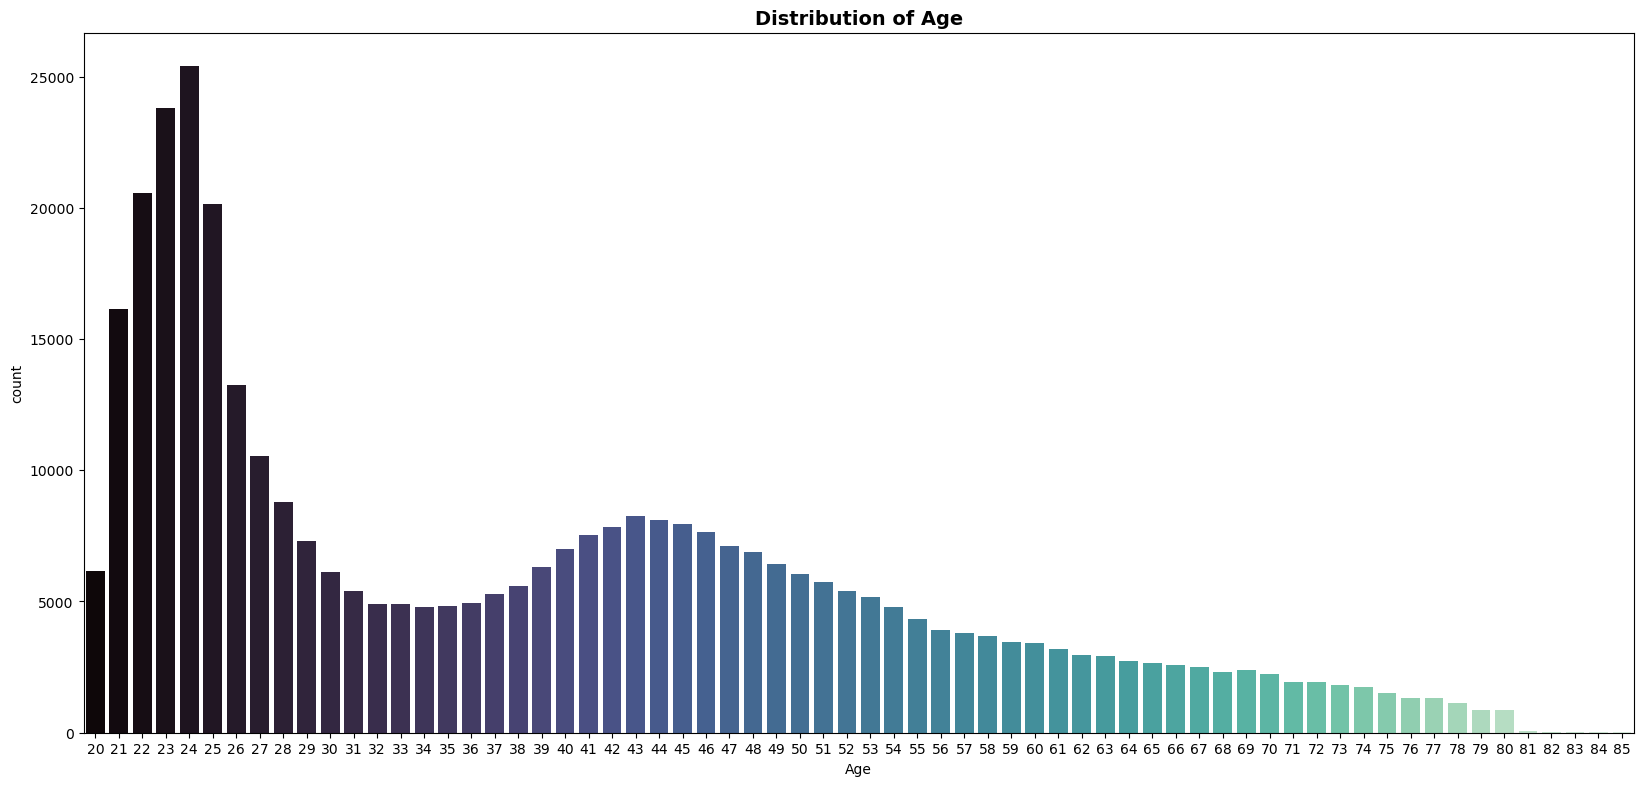

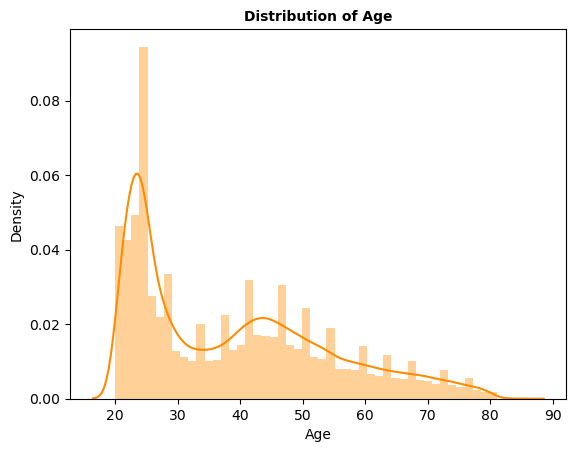

In [22]:
# Distribution of Age
distribution_numerical(train_IQR, 'Age')

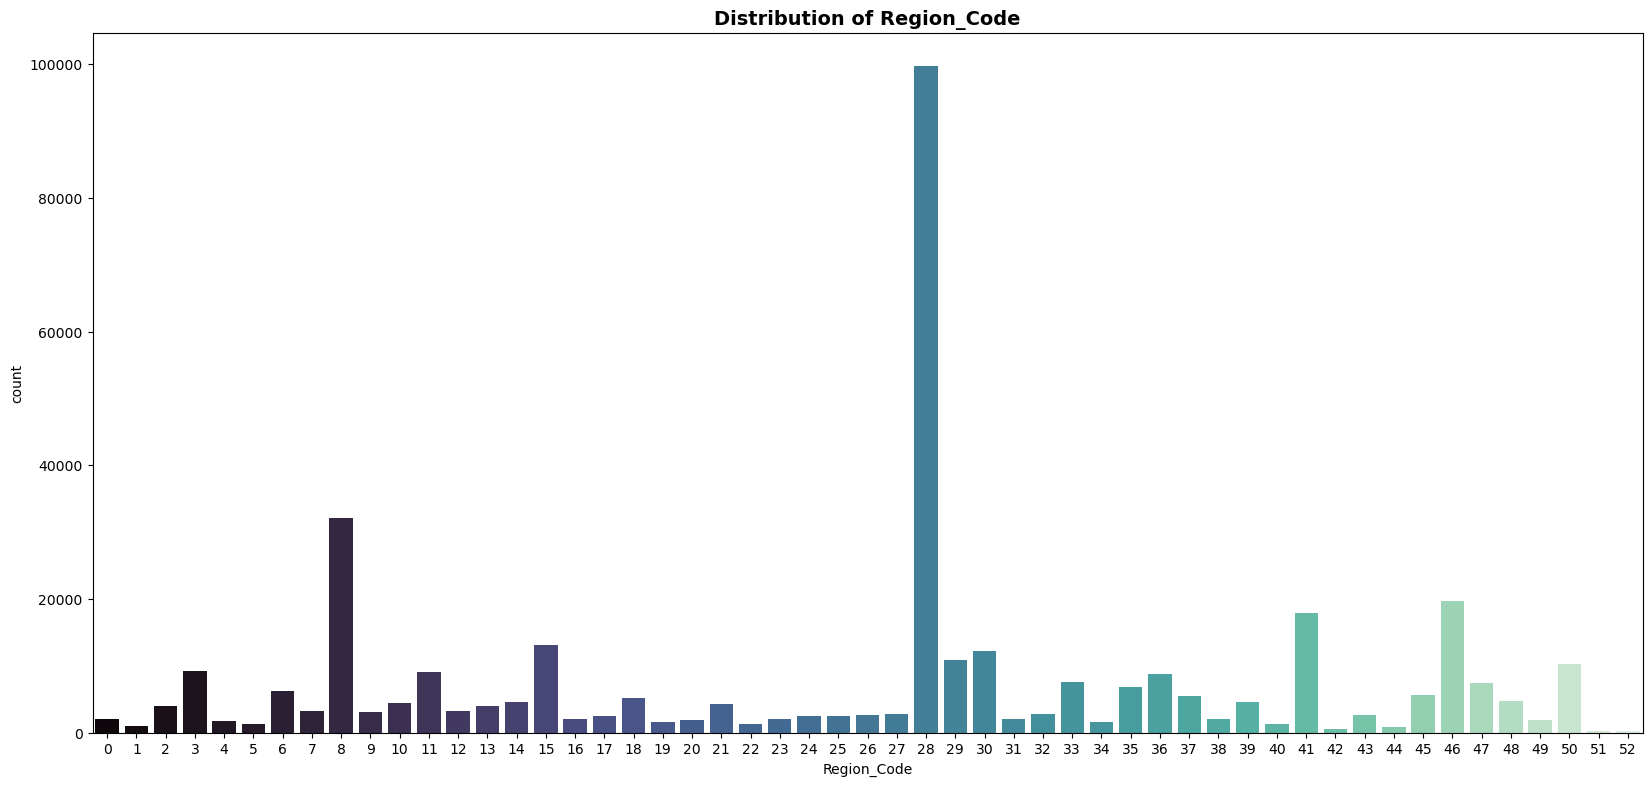

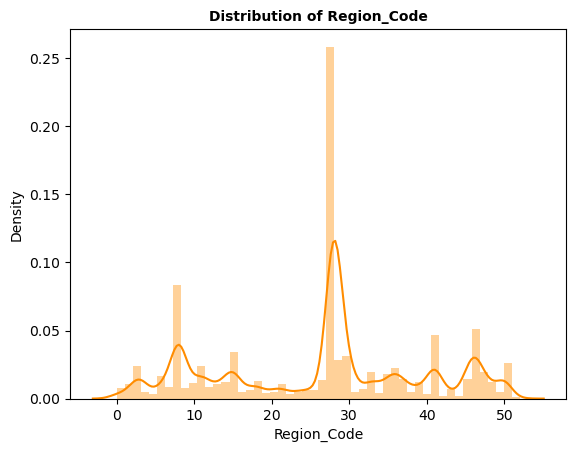

In [23]:
# Distribution of Region_Code
distribution_numerical(train_IQR, 'Region_Code')

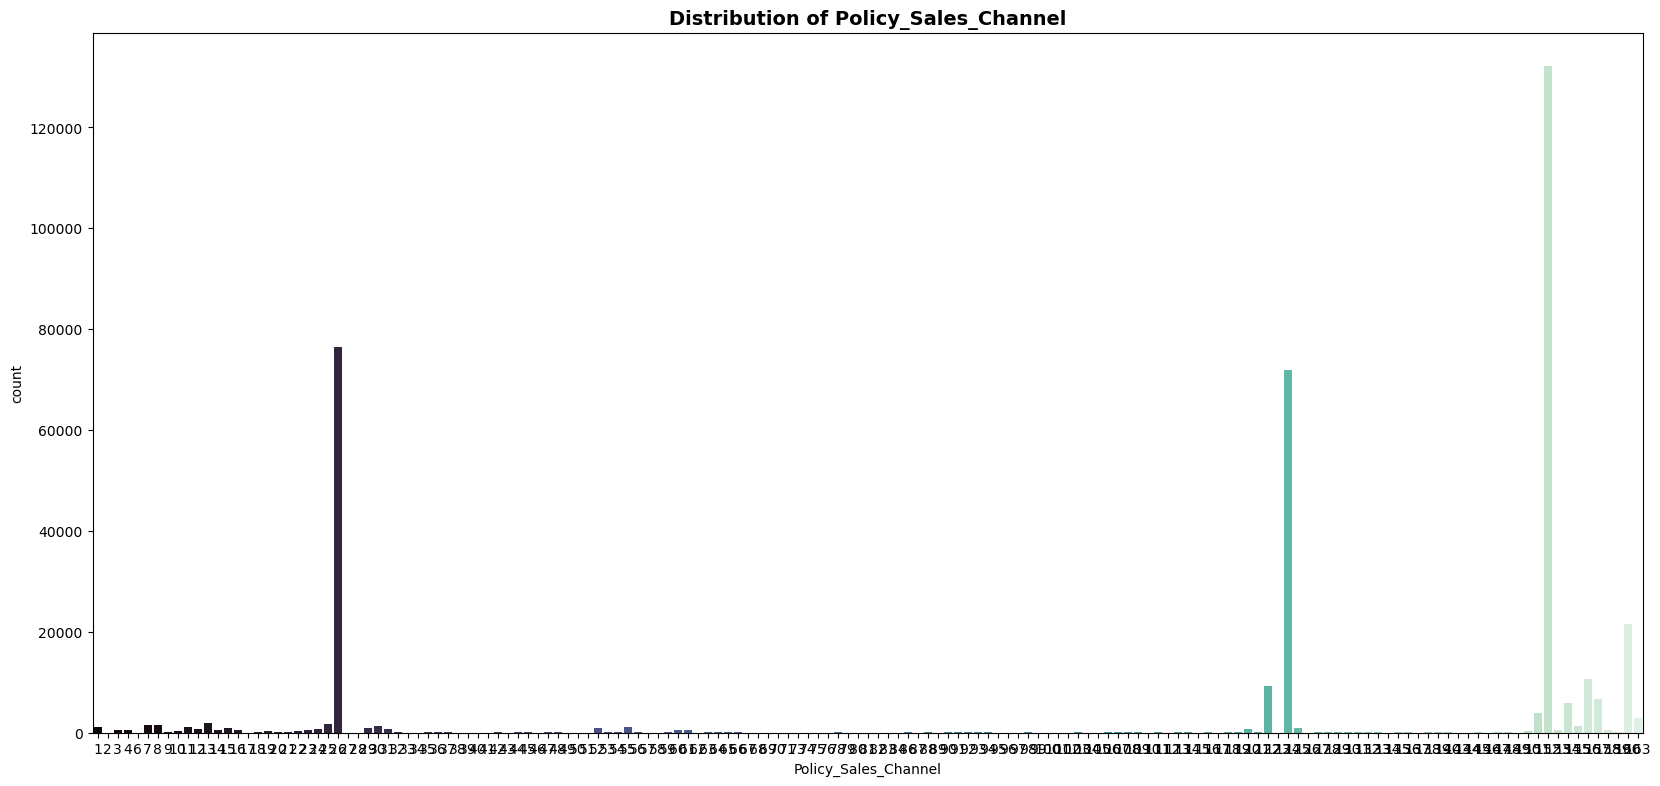

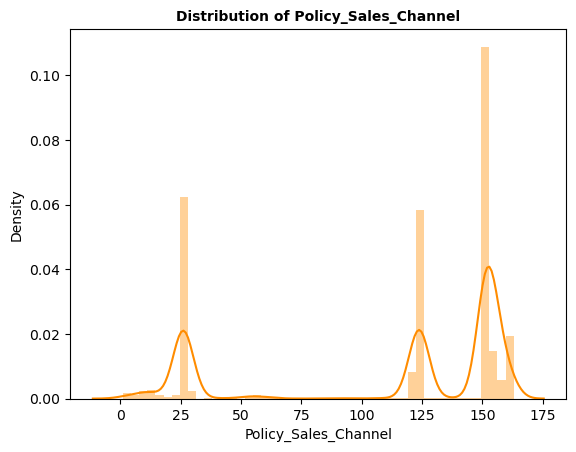

In [24]:
# Distribution of Policy_Sales_Channel
distribution_numerical(train_IQR, 'Policy_Sales_Channel')

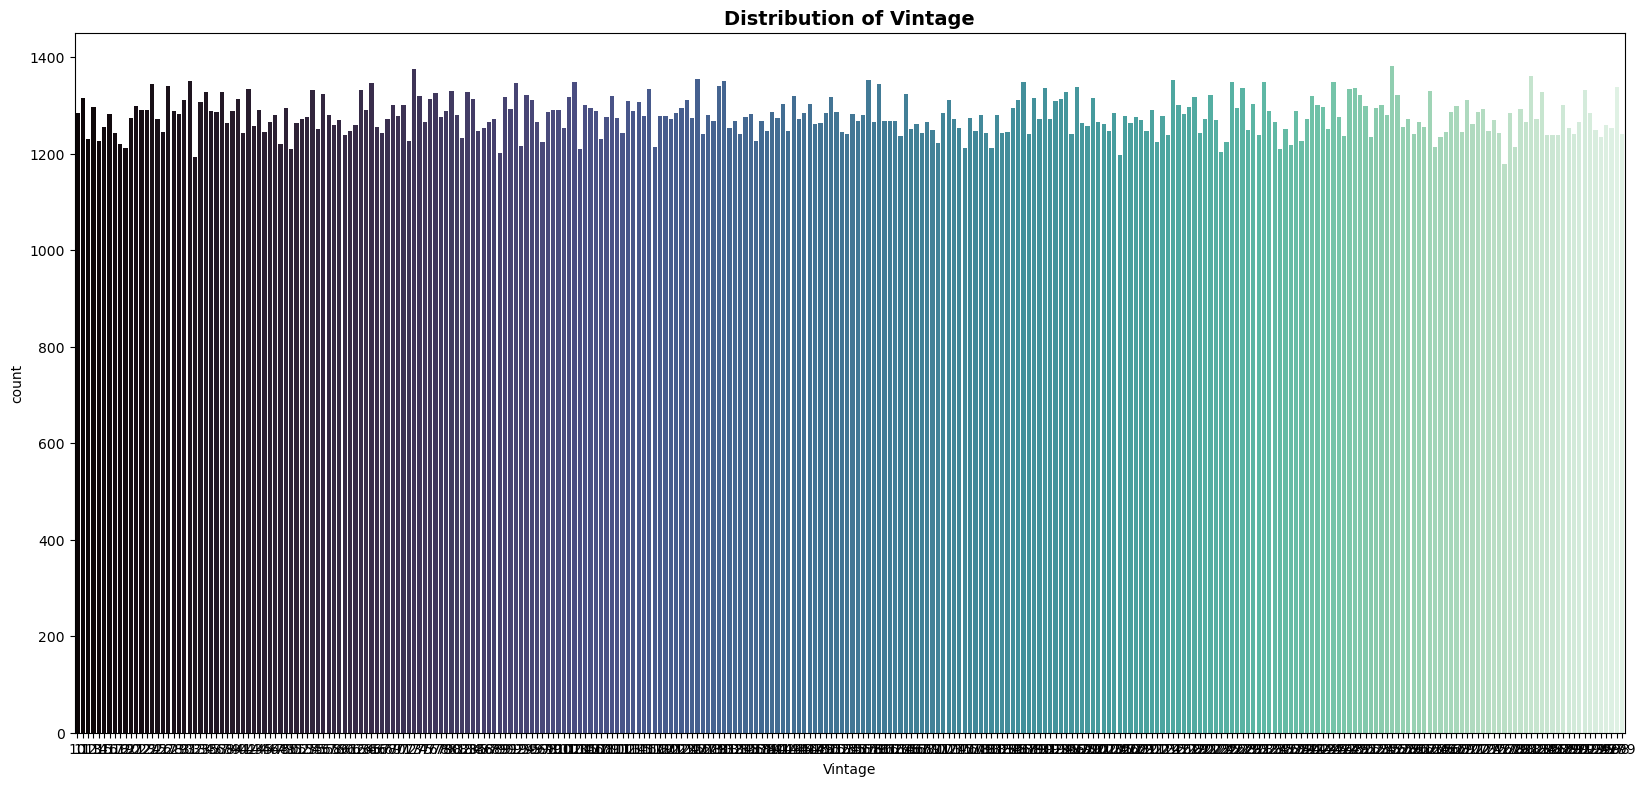

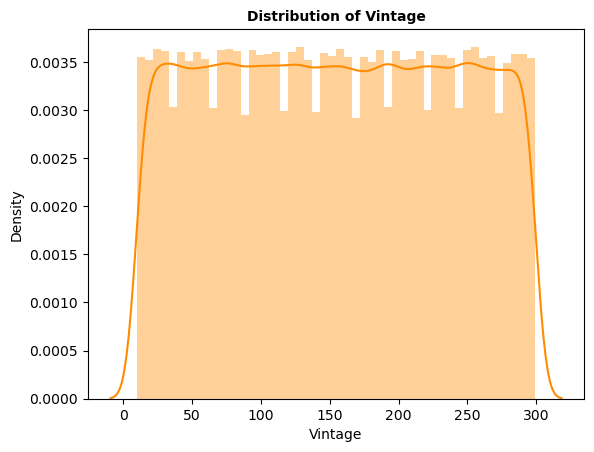

In [25]:
# Distribution of Vintage
distribution_numerical(train_IQR, 'Vintage')

In [26]:
train_IQR['Vintage'].nunique()

290

In [27]:
train_IQR['Vintage'].sort_values()

166685     10
27832      10
296185     10
50410      10
166769     10
         ... 
203469    299
3519      299
203471    299
206533    299
200720    299
Name: Vintage, Length: 370789, dtype: int64

   Driving_License      Ratio
1           370026  99.794223
0              763   0.205777


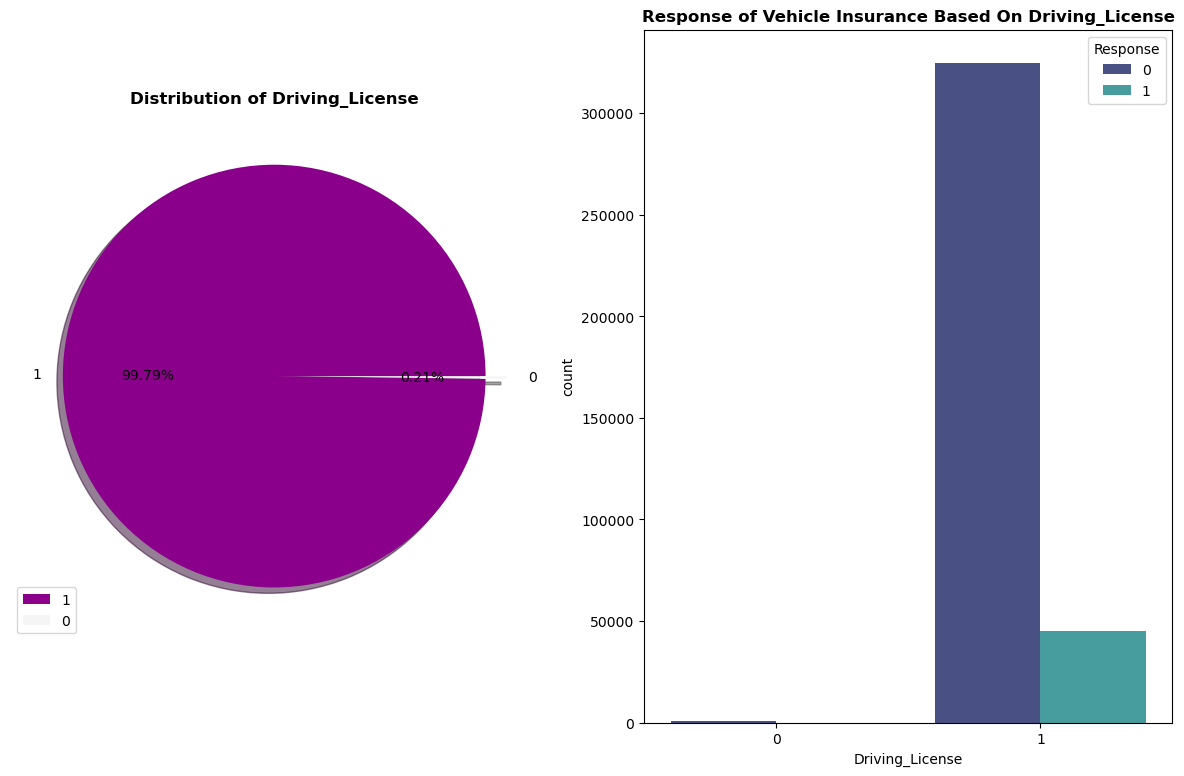

In [28]:
# Distribution of Driving_License
distribution_relation(train_IQR, 'Driving_License')

   Previously_Insured      Ratio
0              200350  54.033426
1              170439  45.966574


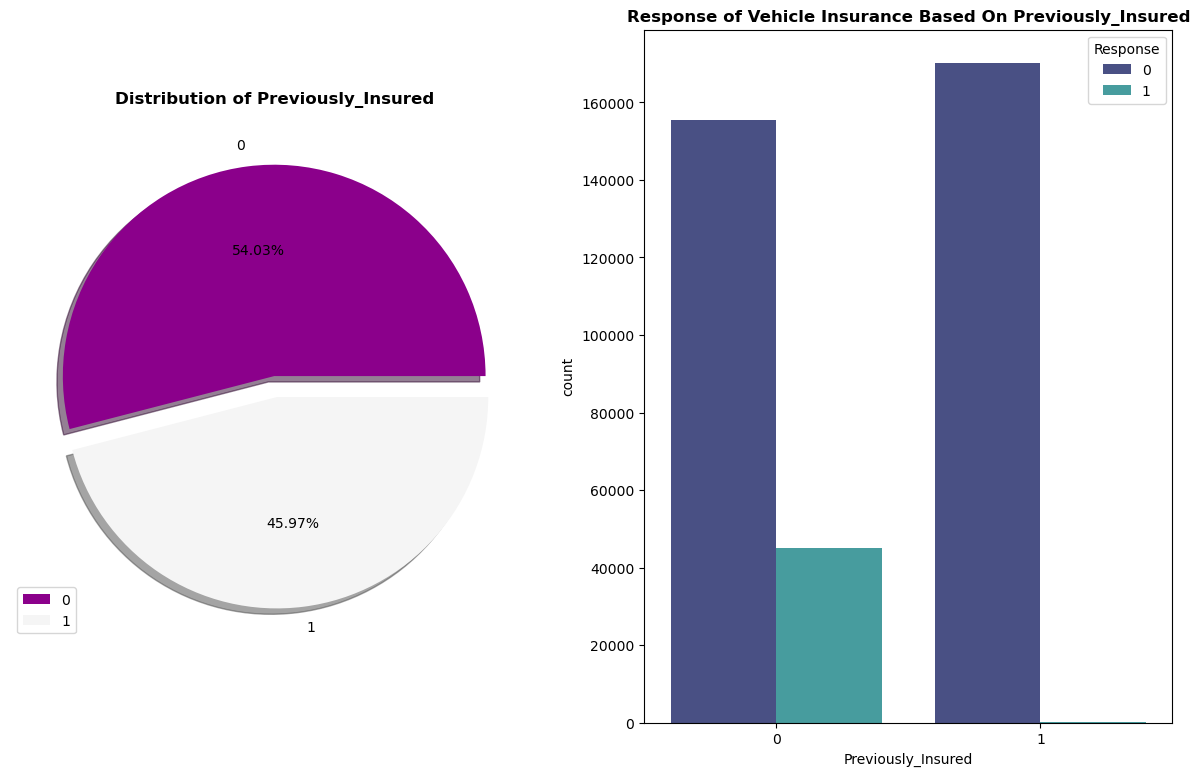

In [29]:
# Distribution of Previously_Insured
distribution_relation(train_IQR, 'Previously_Insured')

Observation:
1. The *Age* feature has positively skewed distribution.
2. Customers who have *Region_Code* 28 are very high compared to other region codes.
3. Just like Region_Code, some *Policy_Sales_Channel* have very significant numbers.
4. The *Age*, *Region_Code*, and *Policy_Sales_Channel* features have very large distribution data, we can do **grouping** for these features.
5. *Vintage* has a unique value of 290 ranging from 10 to 299. Each *Vintage* has almost the same amount, it can be said that from day to day the increase in the number of customers is stable. All of them have more than 14000 customers.
6. Almost all customers have a *Driver_License*.
7. Customers who have *Previously_Insured* have a higher percentage, but the difference with those who do not have *Previously_Insured* is not significant. Nevertheless, we can see that customers who already have car insurance are no longer interested in insuring their vehicles.

#### Analysis for Categorical Data

        Gender      Ratio
Male    200319  54.025065
Female  170470  45.974935


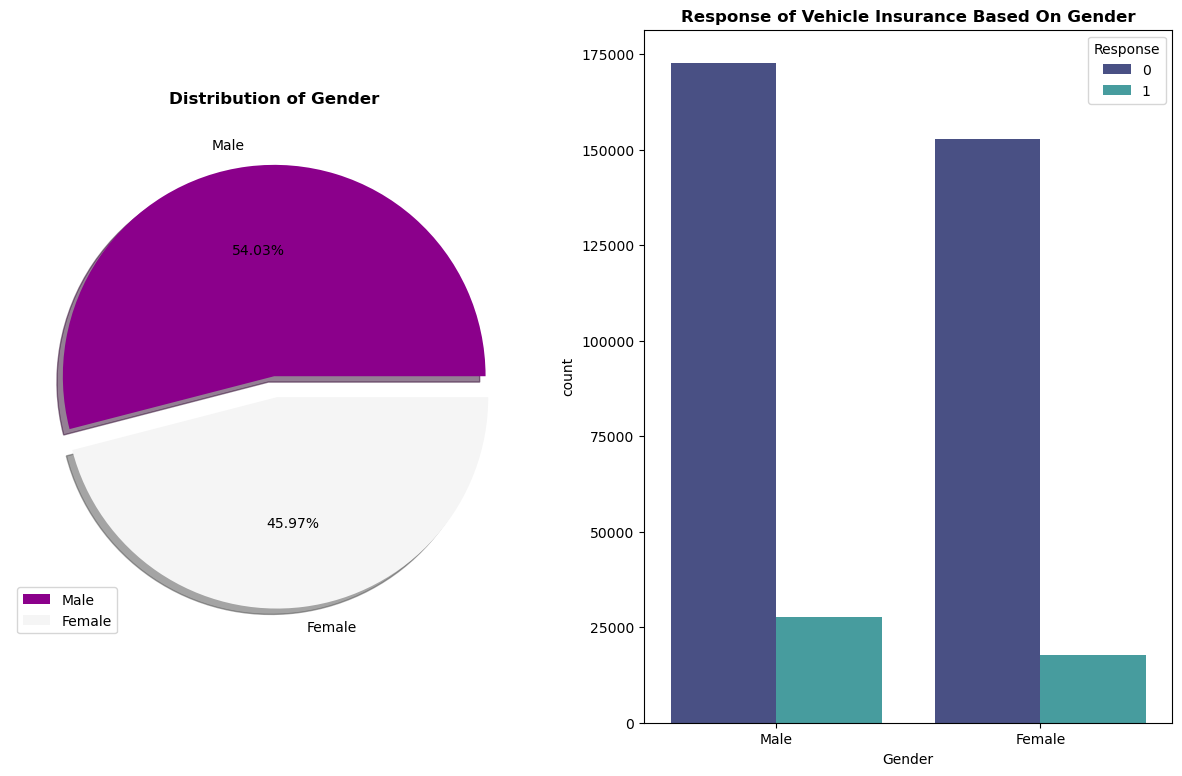

In [30]:
# Distribution of Gender
distribution_relation(train_IQR, 'Gender')

           Vehicle_Age      Ratio
1-2 Year        194212  52.378037
< 1 Year        161547  43.568445
> 2 Years        15030   4.053518


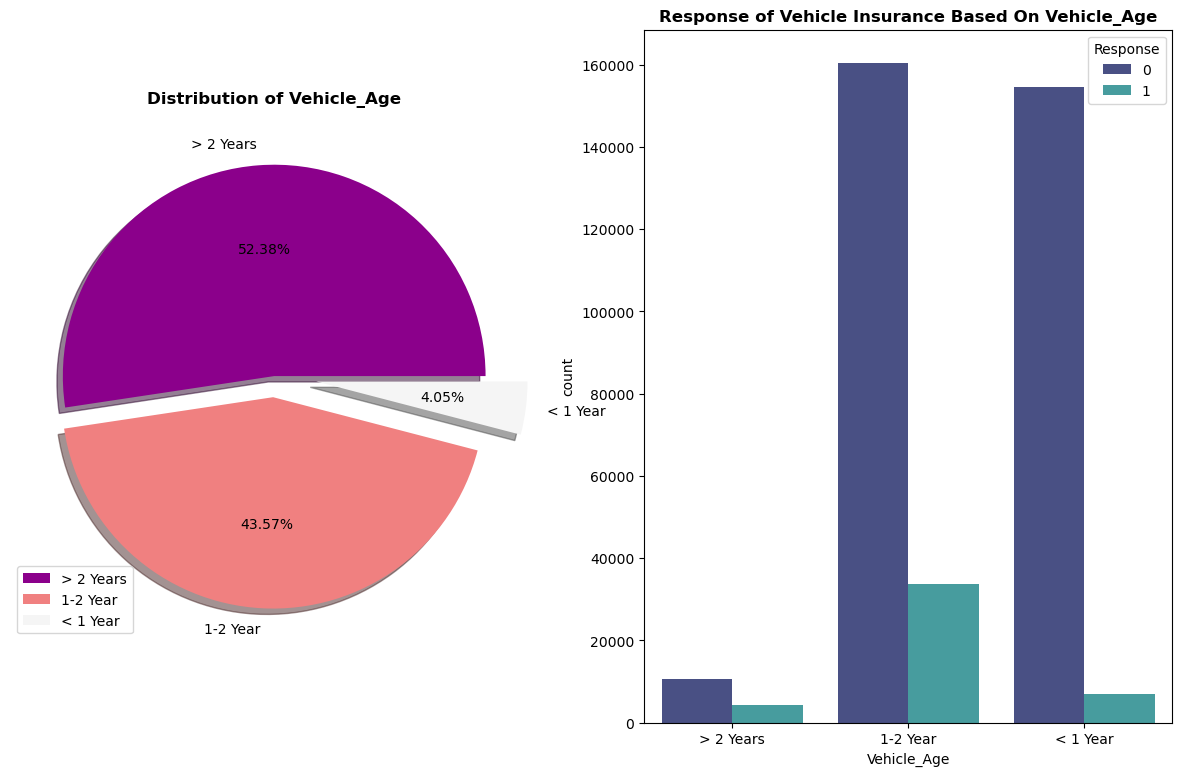

In [31]:
# Distribution of Vehicle_Age
distribution_relation(train_IQR, 'Vehicle_Age')

     Vehicle_Damage      Ratio
Yes          186561  50.314599
No           184228  49.685401


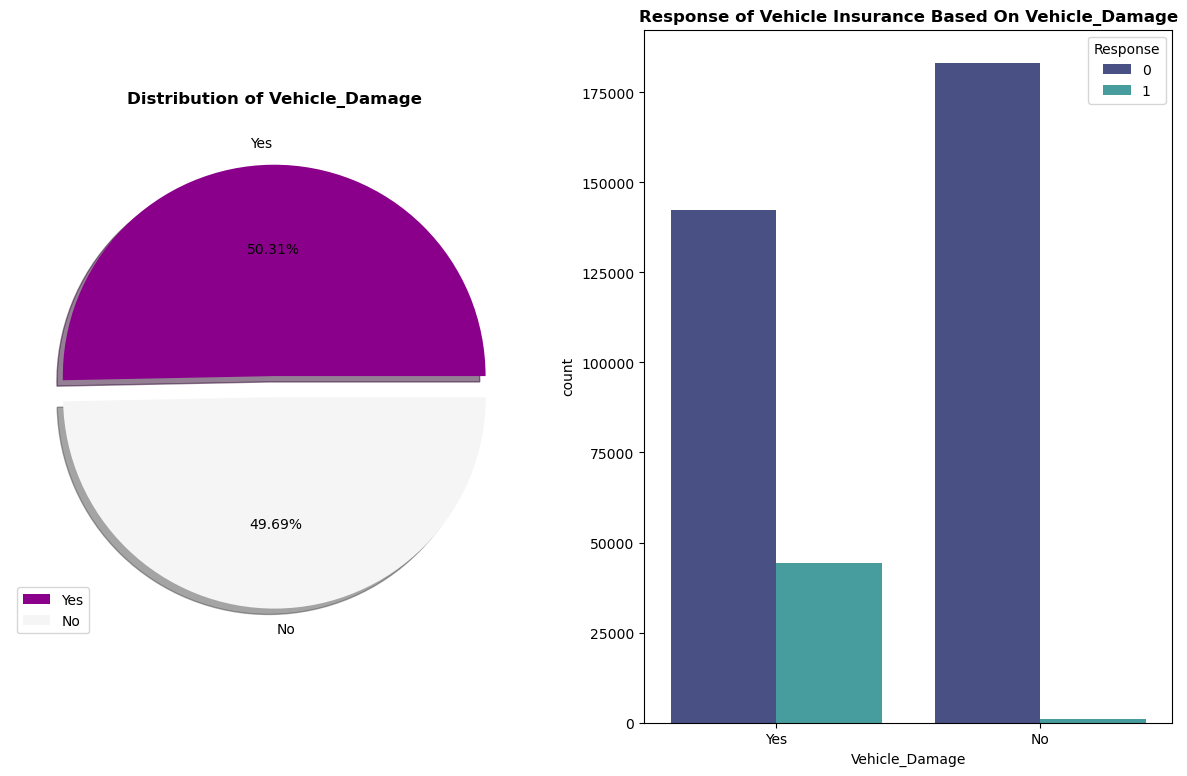

In [32]:
distribution_relation(train_IQR, 'Vehicle_Damage')

Observation:
1. Men are slightly more interested in buying insurance, both health insurance and vehicle insurance.
2. Most customers have *Vehicle_Age* of 1 - 2 years and very few customers who have vehicles > 2 years. The most customers who are interested in buying insurance are customers who have *Vehicle_Age* 1-2 years.
3. Most customers have *Vehicle_Damage* with ratio 50,5% of Yes and 49,5% of No. Customers who have *Vehicle_Damage* are interested in buying vehicle insurance.

#### Exploring Vehicle Damage Features

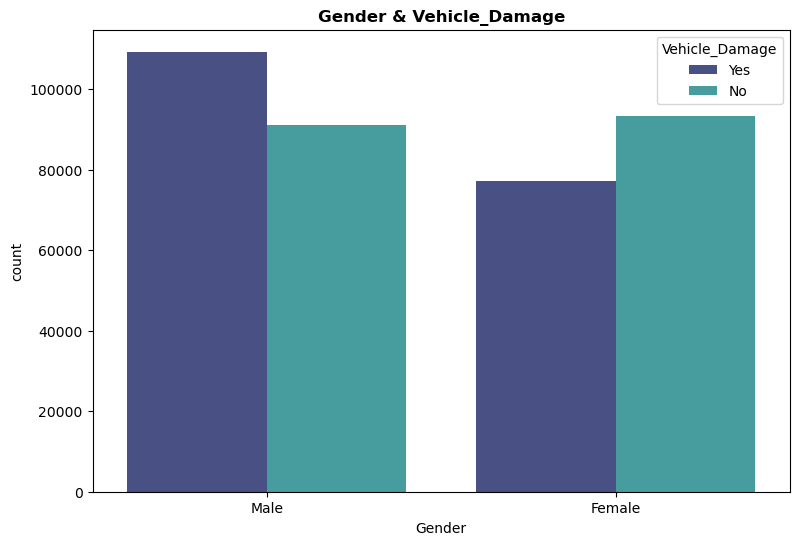

In [33]:
distribution_vehicle_damage('Gender')

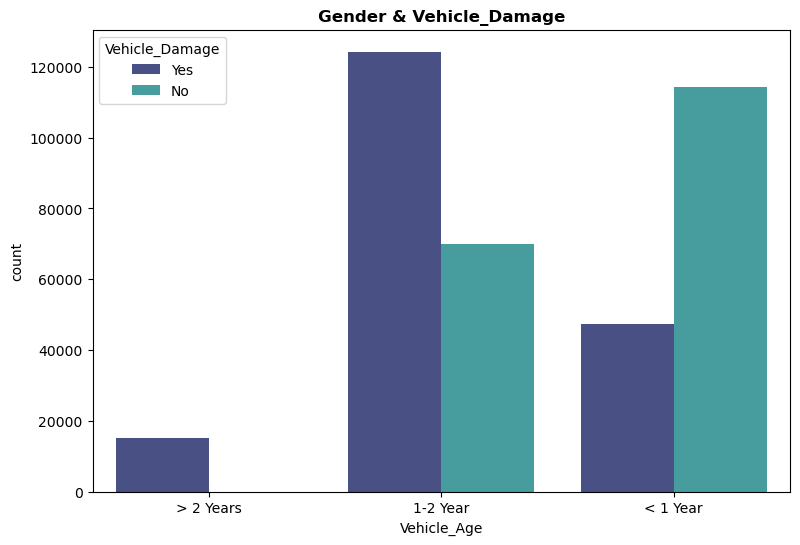

In [34]:
distribution_vehicle_damage('Vehicle_Age')

Observation: 
1. Male customers do more *Vehicle_Damage* than female.
2. Most customers who have *Vehicle_Damage* are customers with *Vehicle_Age* 1-2 years.
3. All *Vehicle_Age* > 2 years have been *Vehicle_Damage*.

#### Analysis for Numerical Data Grouping

           Age_Group      Ratio
AdultAge      139614  37.653221
YouthAge      112252  30.273821
MiddleAge      92318  24.897718
OldAge         26605   7.175240


<Figure size 1500x900 with 0 Axes>

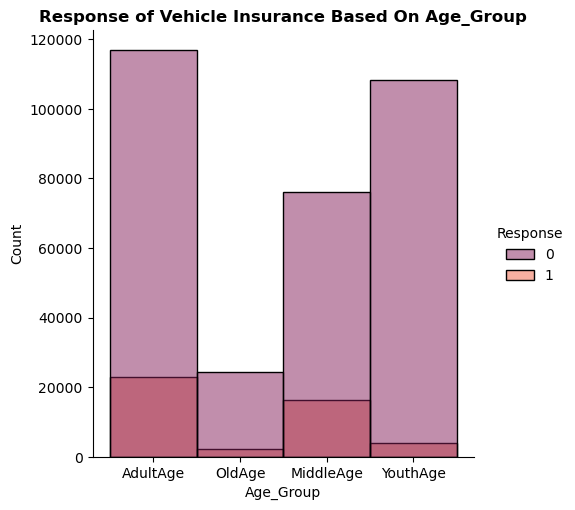

In [35]:
distribution_grouping_numerical(train_IQR, 'Age_Group')

          Region_Code_Group      Ratio
Region_C             154994  41.801132
Region_A             131810  35.548520
Region_B              83985  22.650348


<Figure size 1500x900 with 0 Axes>

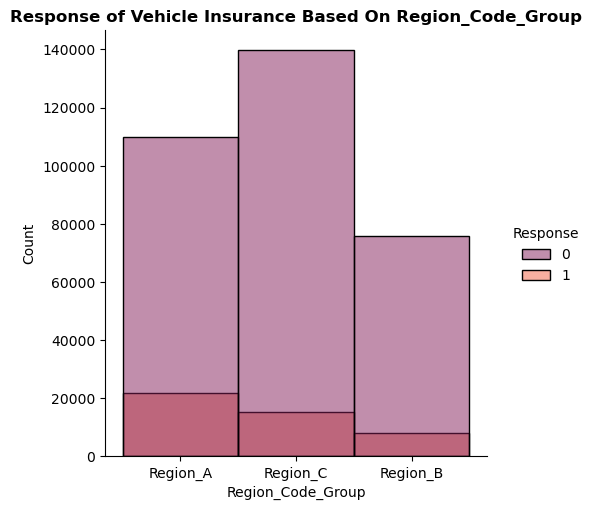

In [36]:
distribution_grouping_numerical(train_IQR, 'Region_Code_Group')

           Policy_Sales_Channel_Group      Ratio
Channel_A                      301934  81.430140
Channel_D                       36428   9.824455
Channel_C                       21836   5.889064
Channel_B                       10591   2.856341


<Figure size 1500x900 with 0 Axes>

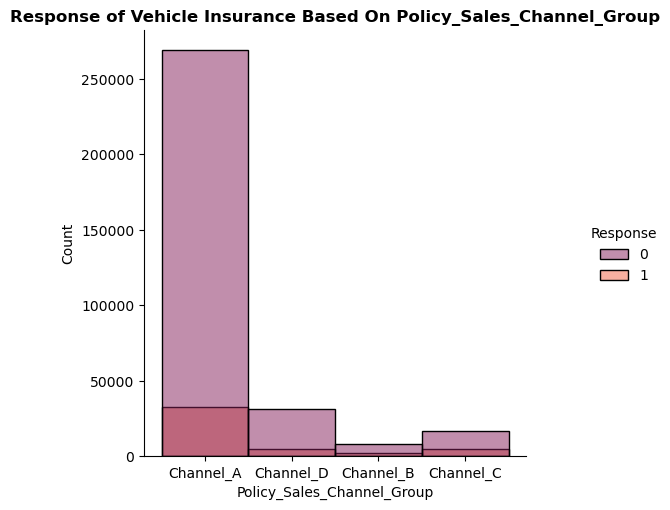

In [37]:
distribution_grouping_numerical(train_IQR, 'Policy_Sales_Channel_Group')

Observation:
1. The order of most customers is AdultAge, YouthAge, MiddleAge, and OldAge. AdultAge are more interested in buying vehicle insurance than OldAge. In addition, we can see that the number of YouthAge customers is quite large, but there are very few car insurance enthusiasts.
2. Most Region_A customers are interested in buying vehicle insurance. Region_C has the largest number of customers, but few are interested in vehicle insurance.
3. Channel_A is the most used by customers.

In [38]:
pd.crosstab(index = [train_IQR['Previously_Insured'], train_IQR['Vehicle_Age'], train_IQR['Vehicle_Damage']], columns=train_IQR['Response'])

Response                                            0      1
Previously_Insured Vehicle_Age Vehicle_Damage               
0                  1-2 Year    No               11755    545
                               Yes              85448  33107
                   < 1 Year    No               10806    353
                               Yes              36702   6647
                   > 2 Years   No                   8      0
                               Yes              10630   4349
1                  1-2 Year    No               57603     37
                               Yes               5661     56
                   < 1 Year    No              103083     32
                               Yes               3896     28
                   > 2 Years   No                   6      0
                               Yes                 36      1

Observation:
1. If the vehicle was previously uninsured and damaged, in any age range the customer will be interested in buying insurance. However, the most customers are those who have 1-2 years of vehicles.
3. If the vehicle is > 2 years old and has not been damaged, then choose not to do insurance at all.
4. Vehicles that are > 2 years old and have been insured are not interested at all for insurance anymore, even though the vehicle is damaged.

## Feature Engineering

### Label Encoding

In [39]:
# Grouping columns
col_label = ['Gender', 'Vehicle_Damage']

# showing the precise value counts
for col in col_label:
  print(f"Value counts of \033[1m{col}\033[0m column")
  print(train_IQR[col].value_counts(), '\n')

Value counts of Gender column
Male      200319
Female    170470
Name: Gender, dtype: int64 

Value counts of Vehicle_Damage column
Yes    186561
No     184228
Name: Vehicle_Damage, dtype: int64 



In [40]:
# Label Encoding for Gender
le = preprocessing.LabelEncoder()
le.fit(train_IQR['Gender'])
train_IQR['Gender'] = le.transform(train_IQR['Gender']) 

# Label Encoding for Vehicle_Damage
le_vd = preprocessing.LabelEncoder()
le_vd.fit(train_IQR['Vehicle_Damage'])
train_IQR['Vehicle_Damage'] = le_vd.transform(train_IQR['Vehicle_Damage'])

train_IQR.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group,Region_Code_Group,Policy_Sales_Channel_Group
0,1,44,1,28,0,> 2 Years,1,40454.0,26,217,1,AdultAge,Region_A,Channel_A
1,1,76,1,3,0,1-2 Year,0,33536.0,26,183,0,OldAge,Region_C,Channel_A
2,1,47,1,28,0,> 2 Years,1,38294.0,26,27,1,MiddleAge,Region_A,Channel_A
3,1,21,1,11,1,< 1 Year,0,28619.0,152,203,0,YouthAge,Region_C,Channel_A
4,0,29,1,41,1,< 1 Year,0,27496.0,152,39,0,AdultAge,Region_B,Channel_A


### Ordinal Encoding

In [41]:
# Grouping columns
col_ordinal = ['Vehicle_Age', 'Age_Group','Region_Code_Group', 'Policy_Sales_Channel_Group']

# showing the precise value counts
for col in col_ordinal:
  print(f"Value counts of \033[1m{col}\033[0m column")
  print(train_IQR[col].value_counts(), '\n')

Value counts of Vehicle_Age column
1-2 Year     194212
< 1 Year     161547
> 2 Years     15030
Name: Vehicle_Age, dtype: int64 

Value counts of Age_Group column
AdultAge     139614
YouthAge     112252
MiddleAge     92318
OldAge        26605
Name: Age_Group, dtype: int64 

Value counts of Region_Code_Group column
Region_C    154994
Region_A    131810
Region_B     83985
Name: Region_Code_Group, dtype: int64 

Value counts of Policy_Sales_Channel_Group column
Channel_A    301934
Channel_D     36428
Channel_C     21836
Channel_B     10591
Name: Policy_Sales_Channel_Group, dtype: int64 



In [42]:
# Ordinal Encoding for Vehicle_Age
train_IQR['Vehicle_Age'] = train_IQR['Vehicle_Age'].apply(lambda x: 1 if x == '< 1 Year' 
                                                       else 2 if x == '1-2 Year' 
                                                       else 3)

# Ordinal Encoding for Age_Group
train_IQR['Age_Group'] = train_IQR['Age_Group'].apply(lambda x: 1 if x == 'YouthAge' 
                                                       else 2 if x == 'AdultAge' 
                                                       else 3 if x == 'MiddleAge'
                                                       else 4)

# Ordinal Encoding for Region_Code_Group
train_IQR['Region_Code_Group'] = train_IQR['Region_Code_Group'].apply(lambda x: 1 if x == 'Region_A' 
                                                       else 2 if x == 'Region_B' 
                                                       else 3)

# Ordinal Encoding for Policy_Sales_Channel_Group
train_IQR['Policy_Sales_Channel_Group'] = train_IQR['Policy_Sales_Channel_Group'].apply(lambda x: 1 if x == 'Channel_A' 
                                                       else 2 if x == 'Channel_B' 
                                                       else 3 if x == 'Channel_C' 
                                                       else 4)

train_IQR.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group,Region_Code_Group,Policy_Sales_Channel_Group
0,1,44,1,28,0,3,1,40454.0,26,217,1,2,1,1
1,1,76,1,3,0,2,0,33536.0,26,183,0,4,3,1
2,1,47,1,28,0,3,1,38294.0,26,27,1,3,1,1
3,1,21,1,11,1,1,0,28619.0,152,203,0,1,3,1
4,0,29,1,41,1,1,0,27496.0,152,39,0,2,2,1


## Feature Selection

In [43]:
train_drop = train_IQR.copy()
# Drop the grouped numeric column
grouping_cols = ['Age', 'Region_Code', 'Policy_Sales_Channel']
train_drop.drop(columns = grouping_cols, inplace = True)

# Drop unnecessary columns
unnec_cols = ['Driving_License', 'Vintage']
train_drop.drop(columns = unnec_cols, inplace = True)
train_drop.head()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response,Age_Group,Region_Code_Group,Policy_Sales_Channel_Group
0,1,0,3,1,40454.0,1,2,1,1
1,1,0,2,0,33536.0,0,4,3,1
2,1,0,3,1,38294.0,1,3,1,1
3,1,1,1,0,28619.0,0,1,3,1
4,0,1,1,0,27496.0,0,2,2,1


### Split Features and Target

In [1]:
#Split features and target in train dataset
X_train = train_drop.drop(['Response'],axis=1)
y_train = train_drop['Response']

NameError: name 'train_drop' is not defined

### Check Multicollinerity

In [45]:
#VIF score are calculated because we need to check which feature that give impact to our target variable and which features that correlated on by other so that we can reduce it to make our model robust and have no bias
#VIF score first diagnosis 
X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
                      for i in range(X.shape[1])], 
                      index=X.columns).reset_index()
vif_df.columns = ['Features','VIF_score']
vif_df = vif_df.loc[vif_df.Features!='const']
vif_df

,Features,VIF_score
1,Gender,1.029941
2,Previously_Insured,3.147310
3,Vehicle_Age,2.391662
4,Vehicle_Damage,3.189652
5,Annual_Premium,1.142574
6,Age_Group,2.067880
7,Region_Code_Group,1.227889
8,Policy_Sales_Channel_Group,1.080877


Observation: No feature has a value greater than 4

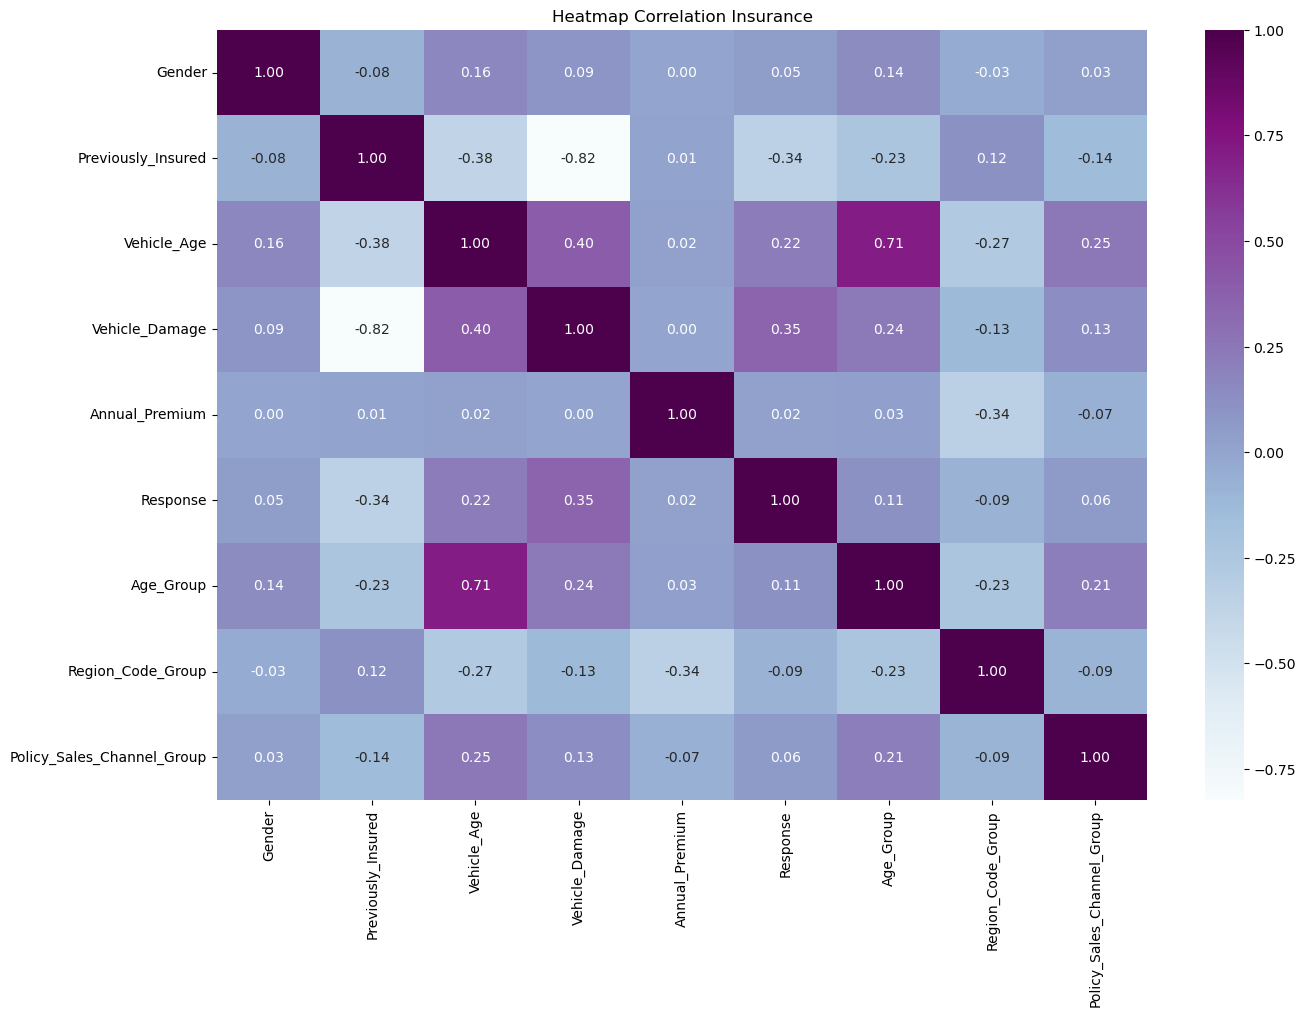

In [46]:
# adjust the figure size for better readability
plt.figure(figsize=(15,10))

# plot the heatmap
correlation = train_drop.corr()
sns.heatmap(correlation, annot=True, cmap='BuPu', fmt='.2f')
plt.title('Heatmap Correlation Insurance')
plt.show()

Observation: There are features that have a fairly high correlation, those features are **Vehicle_Age** and **Age**, because we will use both and the correlation value is below 0.80, so we will not drop any features.

## Imbalanced Data Handling

   Response  Frequency  Percentage
0         0     325634       87.82
1         1      45155       12.18


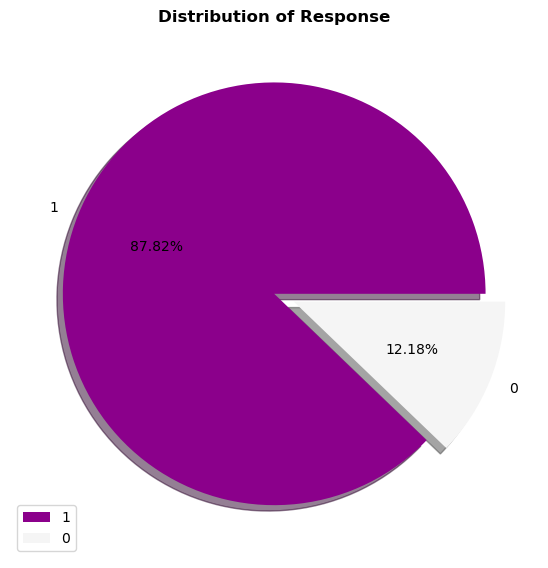

In [47]:
# Frequency and Percentage of Response
target = train_drop['Response'].value_counts().reset_index()
target.rename(columns={'index':'Response','Response':'Frequency'}, inplace=True)
target['Percentage'] = round((target['Frequency']/target['Frequency'].sum())*100,2)
print(target)

# Pie plot
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
labels = train_drop['Response'].unique()
size = train_drop['Response'].value_counts()
if len(labels)==2:
    colors = ['darkmagenta', 'whitesmoke']
    explode = [0, 0.1]
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.axis('off')
plt.legend(loc='lower left')
plt.title('Distribution of Response', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.show()

Observation: Data is imbalanced. Because the data is large, we can undersampling

In [48]:
# Handling imbalance data using undersampling
X = train_drop.drop(['Response'],axis=1)
y = train_drop['Response']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

In [49]:
train_undersampling = pd.concat([X_under, y_under], axis=1)
train_undersampling.head(5)

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Age_Group,Region_Code_Group,Policy_Sales_Channel_Group,Response
0,1,1,2,0,34601.0,2,3,1,0
1,0,1,2,0,32304.0,2,3,1,0
2,1,1,1,0,25297.0,1,3,1,0
3,1,0,2,1,20175.0,2,3,1,0
4,0,1,1,0,24070.0,1,3,1,0


   Response  Frequency  Percentage
0         0      45155        50.0
1         1      45155        50.0


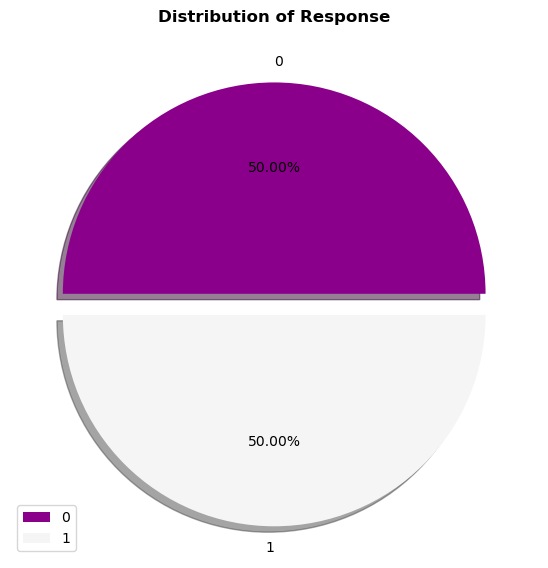

In [50]:
# Frequency and Percentage of Response
target = train_undersampling['Response'].value_counts().reset_index()
target.rename(columns={'index':'Response','Response':'Frequency'}, inplace=True)
target['Percentage'] = round((target['Frequency']/target['Frequency'].sum())*100,2)
print(target)

# Pie plot
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
labels = train_undersampling['Response'].unique()
size = train_undersampling['Response'].value_counts()
if len(labels)==2:
    colors = ['darkmagenta', 'whitesmoke']
    explode = [0, 0.1]
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.axis('off')
plt.legend(loc='lower left')
plt.title('Distribution of Response', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.show()

In [51]:
train_undersampling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90310 entries, 0 to 90309
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      90310 non-null  int32  
 1   Previously_Insured          90310 non-null  int64  
 2   Vehicle_Age                 90310 non-null  int64  
 3   Vehicle_Damage              90310 non-null  int32  
 4   Annual_Premium              90310 non-null  float64
 5   Age_Group                   90310 non-null  int64  
 6   Region_Code_Group           90310 non-null  int64  
 7   Policy_Sales_Channel_Group  90310 non-null  int64  
 8   Response                    90310 non-null  int64  
dtypes: float64(1), int32(2), int64(6)
memory usage: 5.5 MB


Observation: Data is balance

## Feature Scaling

In [52]:
# Normalize Annual_Premium
scaler = MinMaxScaler()
train_undersampling['Annual_Premium'] = scaler.fit_transform(train_undersampling['Annual_Premium'].values.reshape(-1,1))
train_undersampling.head()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Age_Group,Region_Code_Group,Policy_Sales_Channel_Group,Response
0,1,1,2,0,0.539486,2,3,1,0
1,0,1,2,0,0.500726,2,3,1,0
2,1,1,1,0,0.382488,1,3,1,0
3,1,0,2,1,0.296058,2,3,1,0
4,0,1,1,0,0.361783,1,3,1,0


## Modeling

#### Baseline Model Using Decision Tree

In [53]:
# Split the train data into train and test
X = train_num.drop(['Response'],axis=1)
y = train_num['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
# Split the train data into train and validation
X = X_train
y = y_train

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [55]:
# Modeling using decisiontree 
model = DecisionTreeClassifier(max_depth=None,  random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [56]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_val, y_pred))
print('Recall:',recall_score(y_val, y_pred))
print('F1 Score:',f1_score(y_val, y_pred))
print('ROC-AUC:',roc_auc_score(y_val, y_pred))

Precision: 0.2722088455202129
Recall: 0.28685897435897434
F1 Score: 0.27934195981533266
ROC-AUC: 0.5897465557904426


In [57]:
model = DecisionTreeClassifier(max_depth=None, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [58]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print('F1 Score:',f1_score(y_test, y_pred))
print('ROC-AUC:',roc_auc_score(y_test, y_pred))

Precision: 0.2817622950819672
Recall: 0.2887745458363961
F1 Score: 0.2852253280091272
ROC-AUC: 0.5918377594322387


              precision    recall  f1-score   support

           0       0.90      0.89      0.90     66699
           1       0.28      0.29      0.29      9523

    accuracy                           0.82     76222
   macro avg       0.59      0.59      0.59     76222
weighted avg       0.82      0.82      0.82     76222



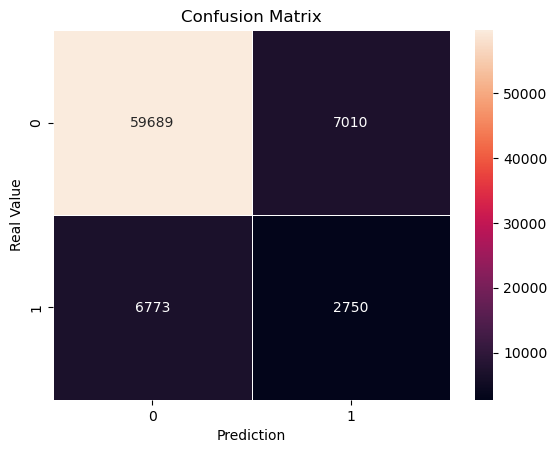

In [59]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cnf_matrix,annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.show()

## Split Dataset

In [60]:
# split data
X = train_undersampling.drop(['Response'],axis=1)
y = train_undersampling['Response']

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X, y, test_size=0.20, random_state=42)

In [61]:
# Split the train data into train and validation
X = X_train_under
y = y_train_under

X_train_under, X_val_under, y_train_under, y_val_under = train_test_split(X, y, test_size=0.20, random_state=42)

#### Decision Tree

In [62]:
# Decision Tree using Undersampling
model_dt = DecisionTreeClassifier(max_depth=None, random_state=42)
model_dt.fit(X_train_under, y_train_under)
y_pred = model_dt.predict(X_val_under)

In [63]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_val_under, y_pred))
print('Recall:',recall_score(y_val_under, y_pred))
print('F1 Score:',f1_score(y_val_under, y_pred))
print('ROC-AUC:',roc_auc_score(y_val_under, y_pred))

Precision: 0.7106734096353473
Recall: 0.7416666666666667
F1 Score: 0.7258393366861492
ROC-AUC: 0.7209022988505748


In [64]:
model_dt = DecisionTreeClassifier(max_depth=None, random_state=42)
model_dt.fit(X_train_under, y_train_under)
y_pred = model_dt.predict(X_test_under)

In [65]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_test_under, y_pred))
print('Recall:',recall_score(y_test_under, y_pred))
print('F1 Score:',f1_score(y_test_under, y_pred))
print('ROC-AUC:',roc_auc_score(y_test_under, y_pred))

Precision: 0.7165287502652239
Recall: 0.7516136211885155
F1 Score: 0.7336519661090594
ROC-AUC: 0.7286054002813447


              precision    recall  f1-score   support

           0       0.74      0.71      0.72      9076
           1       0.72      0.75      0.73      8986

    accuracy                           0.73     18062
   macro avg       0.73      0.73      0.73     18062
weighted avg       0.73      0.73      0.73     18062



Text(50.722222222222214, 0.5, 'Real Value')

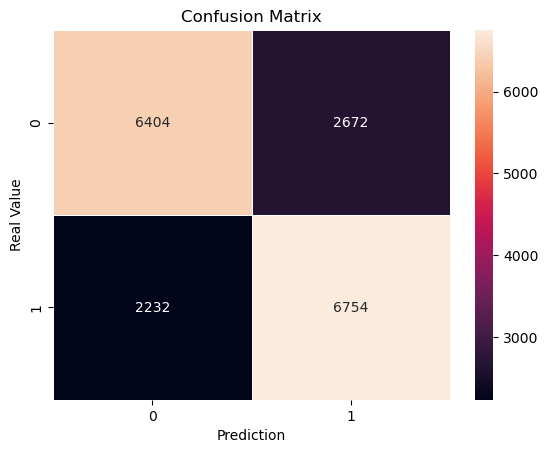

In [66]:
cnf_matrix = confusion_matrix(y_test_under, y_pred)
print(classification_report(y_test_under, y_pred))
sns.heatmap(cnf_matrix,annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

#### KNN

In [67]:
# modeling using KNN with validation data
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_under, y_train_under)
y_pred = model_knn.predict(X_val_under)

In [68]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_val_under, y_pred))
print('Recall:',recall_score(y_val_under, y_pred))
print('F1 Score:',f1_score(y_val_under, y_pred))
print('ROC-AUC:',roc_auc_score(y_val_under, y_pred))

Precision: 0.7132527264106211
Recall: 0.8356944444444444
F1 Score: 0.7696341775390125
ROC-AUC: 0.7510196360153257


In [69]:
# modeling using KNN using test data
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_under, y_train_under)
y_pred = model_knn.predict(X_test_under)

In [70]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_test_under, y_pred))
print('Recall:',recall_score(y_test_under, y_pred))
print('F1 Score:',f1_score(y_test_under, y_pred))
print('ROC-AUC:',roc_auc_score(y_test_under, y_pred))

Precision: 0.7243088655862726
Recall: 0.8455375027821055
F1 Score: 0.7802423495584309
ROC-AUC: 0.7634474644805195


              precision    recall  f1-score   support

           0       0.82      0.68      0.74      9076
           1       0.72      0.85      0.78      8986

    accuracy                           0.76     18062
   macro avg       0.77      0.76      0.76     18062
weighted avg       0.77      0.76      0.76     18062



Text(50.722222222222214, 0.5, 'Real Value')

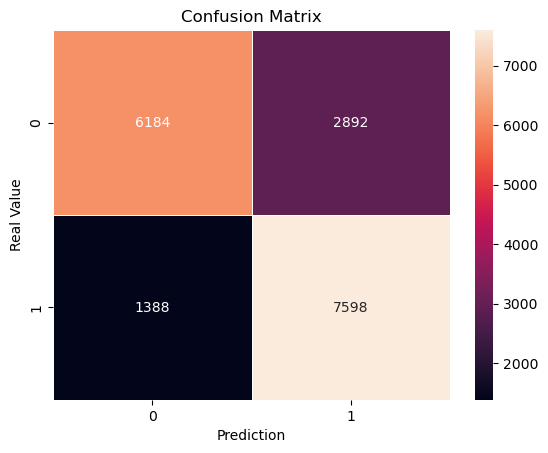

In [71]:
# model Evaluation
cnf_matrix = confusion_matrix(y_test_under, y_pred)
print(classification_report(y_test_under, y_pred))
sns.heatmap(cnf_matrix,annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

#### Random Forest

In [72]:
# modeling using RandomForest using validation data
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_under, y_train_under)
y_pred = model_rf.predict(X_val_under)

In [73]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_val_under, y_pred))
print('Recall:',recall_score(y_val_under, y_pred))
print('F1 Score:',f1_score(y_val_under, y_pred))
print('ROC-AUC:',roc_auc_score(y_val_under, y_pred))

Precision: 0.7081095244333814
Recall: 0.7506944444444444
F1 Score: 0.7287804220319557
ROC-AUC: 0.721692049808429


In [74]:
# RandomForest using test data
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_under, y_train_under)
y_pred = model_rf.predict(X_test_under)

In [75]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_test_under, y_pred))
print('Recall:',recall_score(y_test_under, y_pred))
print('F1 Score:',f1_score(y_test_under, y_pred))
print('ROC-AUC:',roc_auc_score(y_test_under, y_pred))

Precision: 0.7148086174440493
Recall: 0.7606276430002226
F1 Score: 0.7370066853569118
ROC-AUC: 0.730082442037793


              precision    recall  f1-score   support

           0       0.75      0.70      0.72      9076
           1       0.71      0.76      0.74      8986

    accuracy                           0.73     18062
   macro avg       0.73      0.73      0.73     18062
weighted avg       0.73      0.73      0.73     18062



Text(50.722222222222214, 0.5, 'Real Value')

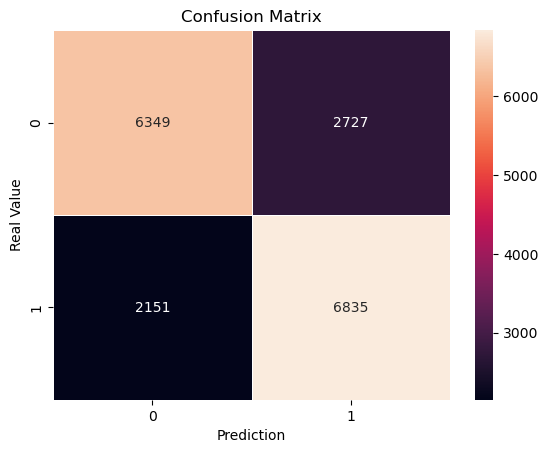

In [76]:
cnf_matrix = confusion_matrix(y_test_under, y_pred)
print(classification_report(y_test_under, y_pred))
sns.heatmap(cnf_matrix,annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

#### Naive Bayes

In [77]:
# modeling using naive bayes
model_nb = GaussianNB()
model_nb.fit(X_train_under, y_train_under)
y_pred = model_nb.predict(X_val_under)

In [78]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_val_under, y_pred))
print('Recall:',recall_score(y_val_under, y_pred))
print('F1 Score:',f1_score(y_val_under, y_pred))
print('ROC-AUC:',roc_auc_score(y_val_under, y_pred))

Precision: 0.6969817315329627
Recall: 0.975
F1 Score: 0.8128763316350162
ROC-AUC: 0.7770172413793103


In [79]:
model_nb = GaussianNB()
model_nb.fit(X_train_under, y_train_under)
y_pred = model_nb.predict(X_test_under)

In [80]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_test_under, y_pred))
print('Recall:',recall_score(y_test_under, y_pred))
print('F1 Score:',f1_score(y_test_under, y_pred))
print('ROC-AUC:',roc_auc_score(y_test_under, y_pred))

Precision: 0.7026616577411877
Recall: 0.9782995771199644
F1 Score: 0.8178815648695166
ROC-AUC: 0.7842136933638605


              precision    recall  f1-score   support

           0       0.96      0.59      0.73      9076
           1       0.70      0.98      0.82      8986

    accuracy                           0.78     18062
   macro avg       0.83      0.78      0.78     18062
weighted avg       0.83      0.78      0.77     18062



Text(50.722222222222214, 0.5, 'Real Value')

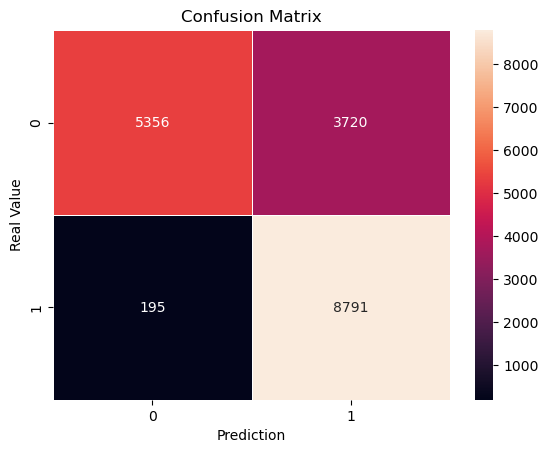

In [81]:
# model Evaluation
cnf_matrix = confusion_matrix(y_test_under, y_pred)
print(classification_report(y_test_under, y_pred))
sns.heatmap(cnf_matrix,annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

#### Check

In [82]:
# split data test and train for Hyperparatemer Tunning

X = train_undersampling.drop(['Response'],axis=1)
y = train_undersampling['Response']

X_train_tuning, X_test_tuning, y_train_tuning, y_test_tuning = train_test_split(X, y, test_size=0.20, random_state=42)

In [83]:
# Split the train data into train and validation for Hyperparatemer Tunning
X = X_train_tuning
y = y_train_tuning

X_train_tuning, X_val_tuning, y_train_tuning, y_val_tuning = train_test_split(X, y, test_size=0.20, random_state=42)

In [111]:
# hyperparameter tuning
# from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(random_state=42)
grid_param = {'n_estimators':[10, 100, 200, 400], 
                      'random_state':[42]}

In [112]:
grid_search = GridSearchCV(bagg, grid_param, cv=3, n_jobs=-1)
grid_search.fit(X_train_tuning, y_train_tuning)

GridSearchCV(cv=3, estimator=BaggingClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 200, 400],
                         'random_state': [42]})

In [113]:
grid_search.best_params_

{'n_estimators': 400, 'random_state': 42}

In [114]:
# Hyperparatemer Tunning into the model using validation data
begg_tuning = BaggingClassifier(n_estimators= 400,
                                   random_state= 42)
begg_tuning.fit(X_train_tuning, y_train_tuning)
y_pred = begg_tuning.predict(X_val_tuning)

In [115]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_val_tuning, y_pred))
print('Recall:',recall_score(y_val_tuning, y_pred))
print('F1 Score:',f1_score(y_val_tuning, y_pred))
print('ROC-AUC:',roc_auc_score(y_val_tuning, y_pred))

Precision: 0.7136784196049012
Recall: 0.7927777777777778
F1 Score: 0.7511514672983287
ROC-AUC: 0.7384578544061304


In [116]:
# Hyperparatemer Tunning into the model using test data
begg_tuning = BaggingClassifier(n_estimators= 400,
                                   random_state= 42)
begg_tuning.fit(X_train_tuning, y_train_tuning)
y_pred = begg_tuning.predict(X_test_tuning)

In [117]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_test_tuning, y_pred))
print('Recall:',recall_score(y_test_tuning, y_pred))
print('F1 Score:',f1_score(y_test_tuning, y_pred))
print('ROC-AUC:',roc_auc_score(y_test_tuning, y_pred))

Precision: 0.7205074418140046
Recall: 0.8026930781215224
F1 Score: 0.7593830604832341
ROC-AUC: 0.7472037448783019


              precision    recall  f1-score   support

           0       0.78      0.69      0.73      9076
           1       0.72      0.80      0.76      8986

    accuracy                           0.75     18062
   macro avg       0.75      0.75      0.75     18062
weighted avg       0.75      0.75      0.75     18062



Text(50.722222222222214, 0.5, 'Real Value')

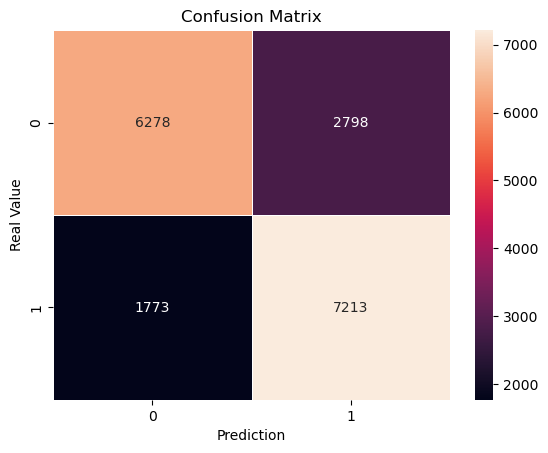

In [118]:
# model Evaluation
cnf_matrix = confusion_matrix(y_test_tuning, y_pred)
print(classification_report(y_test_tuning, y_pred))
sns.heatmap(cnf_matrix,annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

Observation: Based on the modeling evaluation, the best accuracy is given by Random Forest, so we will develop a model using Random Forest

## Hyperparameter Tuning of Random Forest

In [85]:
# split data test and train for Hyperparatemer Tunning

X = train_undersampling.drop(['Response'],axis=1)
y = train_undersampling['Response']

X_train_tuning, X_test_tuning, y_train_tuning, y_test_tuning = train_test_split(X, y, test_size=0.20, random_state=42)

In [86]:
# Split the train data into train and validation for Hyperparatemer Tunning
X = X_train_tuning
y = y_train_tuning

X_train_tuning, X_val_tuning, y_train_tuning, y_val_tuning = train_test_split(X, y, test_size=0.20, random_state=42)

In [87]:
# define random forest model
rf = RandomForestClassifier(random_state = 42)

In [88]:
# hyperparameter tuning
grid_param = {'max_depth': [2, 4],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5],
              'n_estimators': [10, 20, 30, 40, 50, 60]
}

In [89]:
grid_search = GridSearchCV(rf, grid_param, cv=3, n_jobs=2, verbose=1)
grid_search.fit(X_train_tuning, y_train_tuning)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=2,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60]},
             verbose=1)

In [90]:
grid_search.best_params_

{'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [91]:
# Hyperparatemer Tunning into the model using validation data
rf_tuning = RandomForestClassifier(max_depth = 4, 
                               min_samples_leaf = 1, 
                               min_samples_split = 2, 
                               n_estimators = 20, 
                               random_state = 42)
rf_tuning.fit(X_train_tuning, y_train_tuning)
y_pred = rf_tuning.predict(X_val_tuning)

In [92]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_val_tuning, y_pred))
print('Recall:',recall_score(y_val_tuning, y_pred))
print('F1 Score:',f1_score(y_val_tuning, y_pred))
print('ROC-AUC:',roc_auc_score(y_val_tuning, y_pred))

Precision: 0.7231382095828262
Recall: 0.9076388888888889
F1 Score: 0.8049516536305967
ROC-AUC: 0.7812677203065134


In [93]:
# Hyperparatemer Tunning into the model using test data
rf_tuning = RandomForestClassifier(max_depth = 4, 
                               min_samples_leaf = 1, 
                               min_samples_split = 2, 
                               n_estimators = 20, 
                               random_state = 42)
rf_tuning.fit(X_train_tuning, y_train_tuning)
y_pred = rf_tuning.predict(X_test_tuning)

In [94]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_test_tuning, y_pred))
print('Recall:',recall_score(y_test_tuning, y_pred))
print('F1 Score:',f1_score(y_test_tuning, y_pred))
print('ROC-AUC:',roc_auc_score(y_test_tuning, y_pred))

Precision: 0.7335350658597366
Recall: 0.9172045403961718
F1 Score: 0.8151518148551085
ROC-AUC: 0.7936617677741107


              precision    recall  f1-score   support

           0       0.89      0.67      0.76      9076
           1       0.73      0.92      0.82      8986

    accuracy                           0.79     18062
   macro avg       0.81      0.79      0.79     18062
weighted avg       0.81      0.79      0.79     18062



Text(50.722222222222214, 0.5, 'Real Value')

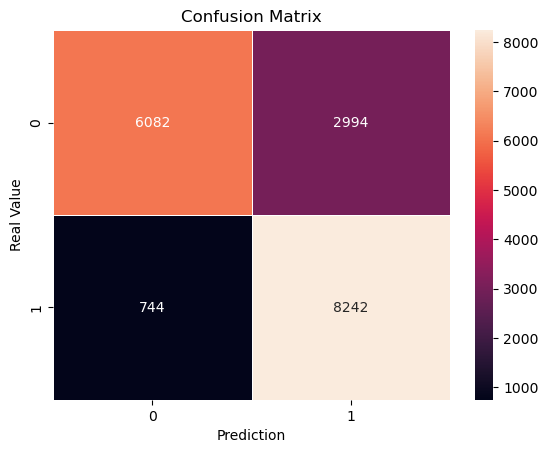

In [95]:
# model Evaluation
cnf_matrix = confusion_matrix(y_test_tuning, y_pred)
print(classification_report(y_test_tuning, y_pred))
sns.heatmap(cnf_matrix,annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

In [96]:
feature_scores = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train_tuning.columns).sort_values(ascending=False)
feature_scores

Vehicle_Damage                0.414754
Previously_Insured            0.392329
Vehicle_Age                   0.114492
Age_Group                     0.059649
Region_Code_Group             0.011901
Policy_Sales_Channel_Group    0.003893
Annual_Premium                0.001584
Gender                        0.001397
dtype: float64

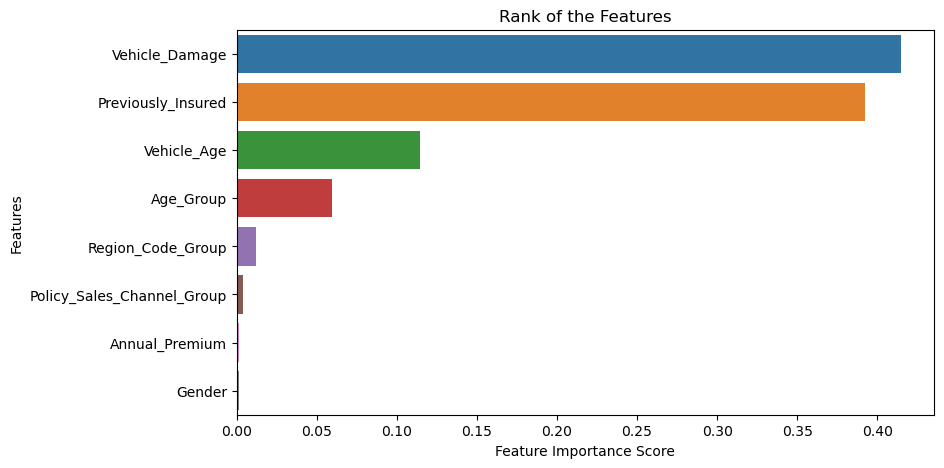

In [97]:
f, ax = plt.subplots(figsize=(9, 5))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Rank of the Features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()

## Hyperparameter Tuning Using Naive Bayes

In [98]:
nb = GaussianNB()

In [99]:
# hyperparameter tuning
grid_param = {'var_smoothing': np.logspace(0,-9, num=100)}

In [100]:
grid_search = GridSearchCV(nb, grid_param, cv=3, n_jobs=2, verbose=1)
grid_search.fit(X_train_tuning, y_train_tuning)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=2,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [101]:
grid_search.best_params_

{'var_smoothing': 0.15199110829529336}

In [102]:
# Hyperparatemer Tunning into the model using validation data
nb_tuning = GaussianNB(var_smoothing= 1e-09)
nb_tuning.fit(X_train_tuning, y_train_tuning)
y_pred = nb_tuning.predict(X_val_tuning)

In [103]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_val_tuning, y_pred))
print('Recall:',recall_score(y_val_tuning, y_pred))
print('F1 Score:',f1_score(y_val_tuning, y_pred))
print('ROC-AUC:',roc_auc_score(y_val_tuning, y_pred))

Precision: 0.6969817315329627
Recall: 0.975
F1 Score: 0.8128763316350162
ROC-AUC: 0.7770172413793103


In [104]:
# Hyperparatemer Tunning into the model using test data
nb_tuning = GaussianNB(var_smoothing= 1e-09)
nb_tuning.fit(X_train_tuning, y_train_tuning)
y_pred = nb_tuning.predict(X_test_tuning)

In [105]:
# calculate Precision, Recall, F1 Score, ROC-AUC
print('Precision:',precision_score(y_test_tuning, y_pred))
print('Recall:',recall_score(y_test_tuning, y_pred))
print('F1 Score:',f1_score(y_test_tuning, y_pred))
print('ROC-AUC:',roc_auc_score(y_test_tuning, y_pred))

Precision: 0.7026616577411877
Recall: 0.9782995771199644
F1 Score: 0.8178815648695166
ROC-AUC: 0.7842136933638605


              precision    recall  f1-score   support

           0       0.96      0.59      0.73      9076
           1       0.70      0.98      0.82      8986

    accuracy                           0.78     18062
   macro avg       0.83      0.78      0.78     18062
weighted avg       0.83      0.78      0.77     18062



Text(50.722222222222214, 0.5, 'Real Value')

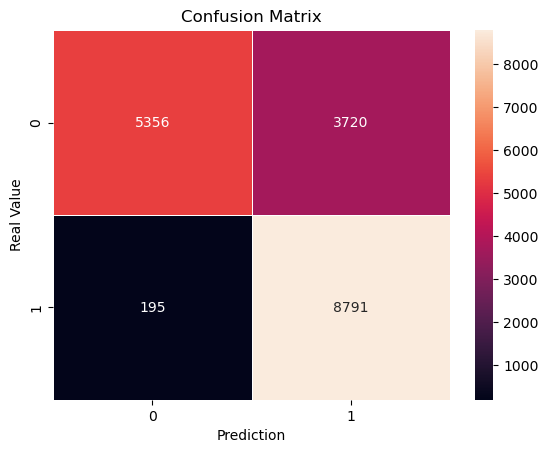

In [106]:
# model Evaluation
cnf_matrix = confusion_matrix(y_test_tuning, y_pred)
print(classification_report(y_test_tuning, y_pred))
sns.heatmap(cnf_matrix,annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')